In [ ]:
'''

Charles Adams
Noah Ponticiello
Shivangi Bhavsar


Studying the relationship between stock sales and annual sales data for Tesla and Apple. 

Comprehending problem statement:
To learn hypothesis  about sales data has upward trajectory influence on the stock sale , 
we have used the amount of sales and see if it corresponds with the stock price or not . 
furthermore to know the pattern we have used  python libraries Pandas, Numpy, Seaborn, Matplotlib. 

1. Loading data in to DataFrames. Integration of SQL and Python --- DONE for Apple & Tesla
2. Check the Data Types of your data columns. DONE for Apple & Tesla
3. Drop any NULL, missing values or unwanted columns. DONE for Apple
4. Drop duplicate values. DONE for Apple 
5. Check for outliers using a box plot or histogram. Box plot for apple and Tesla is histogram DONE for Apple & Tesla
6. Plot features against each other using a pair plot. - DONE for Apple
--> 7. Use a HeatMap for finding the correlation between the features(Feature
to Feature). 
8. Use a scatter plot to show the relationship between 2 variables. DONE for Tesla Done For Apple
---> 9. Merging two Data Frames.
10. Slicing Data of a particular column value (like year, month, filter values
depending on the categorical data) - DONE
-- > 11. Representing data in matrix form.
12. Upload data to Numerical Python (NumPy) - DONE for Apple
13. Select a slice or part of the data and display. DONE for Apple
--> 14. Use conditions and segregate the data based on the condition (like
show data of a feature(column) >,<,= a number)
15. Use mathematical and statistical functions using libraries. - DONE
--> 16. Select data based on a category(categorical data based). 
17. Libraries expected to try(minimum 4 required): Pandas, Numpy,
Seaborn, Matplotlib . DONE
18. Write your own functions and handle exceptions in the functions. DONE
19. Use of *arg and **kwargs. DONE
--> 20. Use of data functions. (FILTER)
'''

"\n\nQuestion: Which is a better stock to invest in? Apple or Tesla.\n\nThe way we are going to determine this by calculating the amount of items each company sold over the past 5 years. \n\nOur hypothesis is that the company that shows the biggest increase in sales from each year will have a more stable\nstock price that heads relatively in an upward trajectory \n\nhypothesis: Apple has a better return than tesla for a $10,000 investment\n\nWe want to a stock that is most stable in price and doesn't flucuate. \n\n1. Loading data in to DataFrames. Integration of SQL and Python --- DONE for Apple & Tesla\n2. Check the Data Types of your data columns. DONE for Apple & Tesla\n3. Drop any NULL, missing values or unwanted columns. DONE for Apple\n4. Drop duplicate values. DONE for Apple \n5. Check for outliers using a box plot or histogram. Box plot for apple and Tesla is histogram DONE for Apple & Tesla\n6. Plot features against each other using a pair plot. - DONE for Apple\n--> 7. Use a 

In [ ]:
import pandas as pd
import numpy as np
import csv
import json
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
https://www.businessofapps.com/data/apple-statistics/
https://carsalesbase.com/us-tesla/

Loading data in to DataFrames. 

In [ ]:
mounteddrive = drive.mount('/content/drive', force_remount=True)
ticker = 'AAPL'

def getdata(*args):

  for arg in args:
    url = 'https://eodhistoricaldata.com/api/eod/' + ticker  + '.US?from=1969-01-01&to=2021-10-24&period=d&fmt=json&api_token=OeAFFmMliFG5orCUuwAKQ8l4WWFQ67YX'
  
  return url

apple_data = pd.read_json(getdata(ticker))
apple_frame = pd.DataFrame(apple_data)

tesla_data = pd.read_csv('/content/drive/MyDrive/cs673/data/TSLA.csv',parse_dates=['date'])
tesla_frame = pd.DataFrame(tesla_data)


Mounted at /content/drive


In [ ]:
apple_frame.dtypes

date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
adjusted_close           float64
volume                     int64
dtype: object

In [ ]:
tesla_frame.dtypes

date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
adjusted_close           float64
volume                     int64
dtype: object

In [ ]:
apple_frame

,date,open,high,low,close,adjusted_close,volume
0,1980-12-11,22.000,22.0000,22.000,22.000,0.0783,0
1,1980-12-12,28.750,28.8760,28.750,28.750,0.1023,2093900
2,1980-12-15,27.250,27.3760,27.250,27.250,0.0970,785200
3,1980-12-16,25.250,25.3760,25.250,25.250,0.0898,472000
4,1980-12-17,25.876,26.0000,25.876,25.876,0.0920,385900
...,...,...,...,...,...,...,...
10298,2021-10-18,143.445,146.8400,143.160,146.550,146.5500,85589175
10299,2021-10-19,147.010,149.1700,146.550,148.760,148.7600,76378894
10300,2021-10-20,148.700,149.7539,148.120,149.260,149.2600,58418788
10301,2021-10-21,148.810,149.6400,147.870,149.480,149.4800,61420990


In [ ]:
tesla_frame

,date,open,high,low,close,adjusted_close,volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2452,2020-03-26,547.390015,560.000000,512.250000,528.159973,528.159973,17380700
2453,2020-03-27,505.000000,525.799988,494.029999,514.359985,514.359985,14377400
2454,2020-03-30,510.260010,516.650024,491.230011,502.130005,502.130005,11998100
2455,2020-03-31,501.250000,542.960022,497.000000,524.000000,524.000000,17771500


In [ ]:
#uncomment if necessary
tesla_frame.set_index('Date',inplace=True)
froms = '2019-01-01'
to = '2020-01-01'
tesla_frame.loc[froms:to]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,306.100006,315.130005,298.799988,310.119995,310.119995,11658600
2019-01-03,307.000000,309.399994,297.380005,300.359985,300.359985,6965200
2019-01-04,306.000000,318.000000,302.730011,317.690002,317.690002,7394100
2019-01-07,321.720001,336.739990,317.750000,334.959991,334.959991,7551200
2019-01-08,341.959991,344.010010,327.019989,335.350006,335.350006,7008500
...,...,...,...,...,...,...
2019-12-24,418.359985,425.470001,412.690002,425.250000,425.250000,8054700
2019-12-26,427.910004,433.480011,426.350006,430.940002,430.940002,10633900
2019-12-27,435.000000,435.309998,426.109985,430.380005,430.380005,9945700


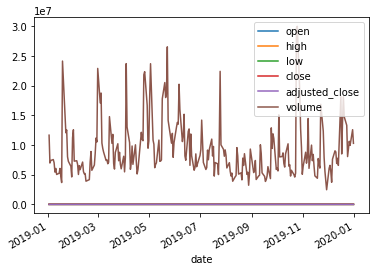

In [ ]:
twenty_tesla = tesla_frame.loc[froms:to]
twenty_tesla.plot()

In [ ]:
apple_frame.sort_index()

,date,open,high,low,close,adjusted_close,volume
0,1980-12-11,22.000,22.0000,22.000,22.000,0.0783,0
1,1980-12-12,28.750,28.8760,28.750,28.750,0.1023,2093900
2,1980-12-15,27.250,27.3760,27.250,27.250,0.0970,785200
3,1980-12-16,25.250,25.3760,25.250,25.250,0.0898,472000
4,1980-12-17,25.876,26.0000,25.876,25.876,0.0920,385900
...,...,...,...,...,...,...,...
10298,2021-10-18,143.445,146.8400,143.160,146.550,146.5500,85589175
10299,2021-10-19,147.010,149.1700,146.550,148.760,148.7600,76378894
10300,2021-10-20,148.700,149.7539,148.120,149.260,149.2600,58418788
10301,2021-10-21,148.810,149.6400,147.870,149.480,149.4800,61420990


In [ ]:
#uncomment if necessary
apple_frame.set_index('date',inplace=True)
froms = '2019-01-01'
to = '2020-01-01'
apple_frame.loc[froms:to]

,open,high,low,close,adjusted_close,volume
date,,,,,,
2019-01-02,154.89,158.8500,154.2300,157.92,38.3822,37039737
2019-01-03,143.98,145.7200,142.0000,142.19,34.5591,91312195
2019-01-04,144.53,148.5499,143.8000,148.26,36.0344,58607070
2019-01-07,148.70,148.8300,145.9000,147.93,35.9542,54777764
2019-01-08,149.56,151.8200,148.5200,150.75,36.6396,41025314
...,...,...,...,...,...,...
2019-12-24,284.69,284.8900,282.9197,284.27,70.1295,12119714
2019-12-26,284.82,289.9800,284.7000,289.91,71.5209,23334004
2019-12-27,291.12,293.9700,288.1200,289.80,71.4938,36592936


# New Section

[link text](https://)JSON Data -- unstructured?



15. Use mathematical and statistical functions using libraries. - DONE

3. Drop any NULL, missing values or unwanted columns

In [ ]:
tesla_frame.dropna
apple_frame.dropna

<bound method DataFrame.dropna of                open      high      low    close  adjusted_close    volume
date                                                                     
1980-12-11   22.000   22.0000   22.000   22.000          0.0783         0
1980-12-12   28.750   28.8760   28.750   28.750          0.1023   2093900
1980-12-15   27.250   27.3760   27.250   27.250          0.0970    785200
1980-12-16   25.250   25.3760   25.250   25.250          0.0898    472000
1980-12-17   25.876   26.0000   25.876   25.876          0.0920    385900
...             ...       ...      ...      ...             ...       ...
2021-10-18  143.445  146.8400  143.160  146.550        146.5500  85589175
2021-10-19  147.010  149.1700  146.550  148.760        148.7600  76378894
2021-10-20  148.700  149.7539  148.120  149.260        149.2600  58418788
2021-10-21  148.810  149.6400  147.870  149.480        149.4800  61420990
2021-10-22  149.690  150.1800  148.640  148.690        148.6900  58883443

[10

In [ ]:
apple_frame.drop('volume',axis=1)

,open,high,low,close,adjusted_close
date,,,,,
1980-12-11,22.000,22.0000,22.000,22.000,0.0783
1980-12-12,28.750,28.8760,28.750,28.750,0.1023
1980-12-15,27.250,27.3760,27.250,27.250,0.0970
1980-12-16,25.250,25.3760,25.250,25.250,0.0898
1980-12-17,25.876,26.0000,25.876,25.876,0.0920
...,...,...,...,...,...
2021-10-18,143.445,146.8400,143.160,146.550,146.5500
2021-10-19,147.010,149.1700,146.550,148.760,148.7600
2021-10-20,148.700,149.7539,148.120,149.260,149.2600


4. Drop duplicate values. DONE for Apple 

In [ ]:
apple_frame.drop_duplicates()
tesla_frame.drop_duplicates()

,open,high,low,close,adjusted_close,volume
date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-03-26,547.390015,560.000000,512.250000,528.159973,528.159973,17380700
2020-03-27,505.000000,525.799988,494.029999,514.359985,514.359985,14377400
2020-03-30,510.260010,516.650024,491.230011,502.130005,502.130005,11998100


Importing Data to SQL From DataFrame

In [ ]:
import sqlite3 as sl

def connect(**kwargs):

  if(kwargs['db'] == 'stock.db'):
    con = sl.connect('stock.db')
    return con
  

con = connect(db='stock.db')



In [ ]:
apple_frame.to_sql('Apple',con,if_exists='append')
result = pd.read_sql('Select * From Apple;',con)

In [ ]:
result

,date,open,high,low,close,adjusted_close,volume
0,1980-12-11 00:00:00,22.000,22.0000,22.000,22.000,0.0783,0
1,1980-12-12 00:00:00,28.750,28.8760,28.750,28.750,0.1023,2093900
2,1980-12-15 00:00:00,27.250,27.3760,27.250,27.250,0.0970,785200
3,1980-12-16 00:00:00,25.250,25.3760,25.250,25.250,0.0898,472000
4,1980-12-17 00:00:00,25.876,26.0000,25.876,25.876,0.0920,385900
...,...,...,...,...,...,...,...
10298,2021-10-18 00:00:00,143.445,146.8400,143.160,146.550,146.5500,85589175
10299,2021-10-19 00:00:00,147.010,149.1700,146.550,148.760,148.7600,76378894
10300,2021-10-20 00:00:00,148.700,149.7539,148.120,149.260,149.2600,58418788
10301,2021-10-21 00:00:00,148.810,149.6400,147.870,149.480,149.4800,61420990


In [ ]:
tesla_frame('high'= 300)

SyntaxError: ignored

In [ ]:
tesla_frame.to_sql('Tesla',con,if_exists='append')
reslts = pd.read_sql('Select open, close, volume FROM Tesla WHERE open <450 AND CLOSE > 400 LIMIT 10;', con)


In [ ]:
reslts

,open,close,volume
0,397.320007,404.040008,18107100
1,410.290008,405.589996,14752700
2,411.779999,419.220001,13319600
3,418.359985,425.250000,8054700
4,427.910004,430.940002,10633900
5,435.000000,430.380005,9945700
6,428.790008,414.700012,12586400
7,405.000000,418.329987,10285700
8,424.500000,430.260010,9532100
9,440.500000,443.010010,17778500


Box Plot and Histograms

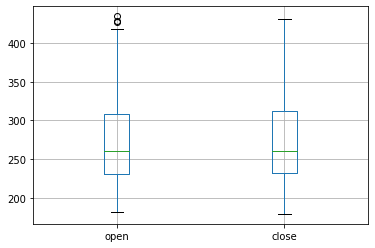

In [ ]:
tesla_frame['2019-01-01':'2020-01-01'].boxplot(column=['open','close'])

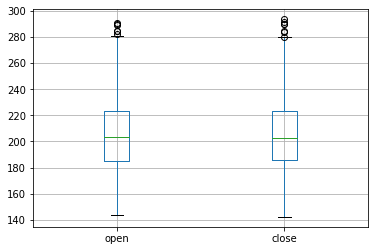

In [ ]:

last_years_data = apple_frame['2019-01-01':'2020-01-01']
last_years_data.boxplot(column=['open','close'])

In [ ]:
apple_frame.dtypes

date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
adjusted_close           float64
volume                     int64
dtype: object

In [ ]:
apple_frame.set_index('date',inplace=True)

In [ ]:
apple_frame['2019-01-01':'2020-01-01'].describe()

,open,high,low,close,adjusted_close,volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,207.869079,209.831616,206.273003,208.255933,51.071050,2.812392e+07
std,34.373587,34.485513,34.305493,34.538970,8.681666,1.084057e+07
min,143.980000,145.720000,142.000000,142.190000,34.559100,1.136204e+07
25%,185.127500,187.832500,183.517500,186.020000,45.487875,2.097740e+07
50%,203.140000,204.715000,201.595000,203.015000,49.779000,2.588393e+07
75%,223.495000,225.040000,221.307500,223.685000,55.017975,3.210649e+07
max,291.120000,293.970000,289.520000,293.650000,72.443600,9.131220e+07


In [ ]:
tesla_data['2019-01-01':'2020-01-01'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,273.028135,277.649801,268.612540,273.530198,273.530198,9.159040e+06
std,52.345474,53.199785,52.062768,53.030267,53.030267,4.764592e+06
min,181.100006,186.679993,176.990005,178.970001,178.970001,2.465600e+06
25%,231.232506,234.770000,227.512501,232.219997,232.219997,6.056550e+06
50%,259.929993,263.979996,256.335007,260.295013,260.295013,7.744350e+06
75%,308.150002,316.150002,303.125000,311.909996,311.909996,1.065152e+07
max,435.000000,435.309998,426.350006,430.940002,430.940002,3.000610e+07


In [ ]:
apply_over_axes

<function numpy.apply_over_axes>

In [ ]:
apple_frame['2019-01-01':'2020-01-01']

,open,high,low,close,adjusted_close,volume
date,,,,,,
2019-01-02,154.89,158.8500,154.2300,157.92,38.3822,37039737
2019-01-03,143.98,145.7200,142.0000,142.19,34.5591,91312195
2019-01-04,144.53,148.5499,143.8000,148.26,36.0344,58607070
2019-01-07,148.70,148.8300,145.9000,147.93,35.9542,54777764
2019-01-08,149.56,151.8200,148.5200,150.75,36.6396,41025314
...,...,...,...,...,...,...
2019-12-24,284.69,284.8900,282.9197,284.27,70.1295,12119714
2019-12-26,284.82,289.9800,284.7000,289.91,71.5209,23334004
2019-12-27,291.12,293.9700,288.1200,289.80,71.4938,36592936


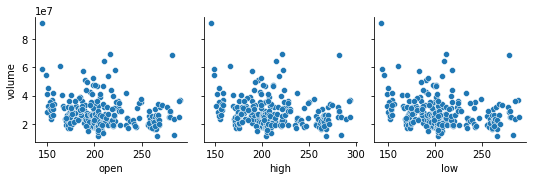

In [ ]:
sns.pairplot(apple_frame['2019-01-01':'2020-01-01'], 
             x_vars=['open','high','low'],
             y_vars=['volume'])

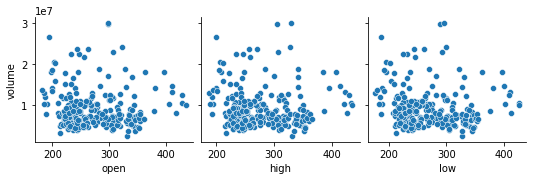

In [ ]:

sns.pairplot(tesla_frame['2019-01-01':'2020-01-01'], 
              x_vars=['open','high','low'],
             y_vars=['volume'])

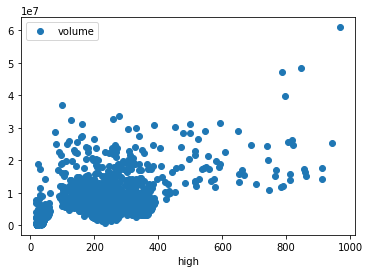

In [ ]:
tesla_frame.plot(x='high',y='volume',style='o')

In [ ]:
tesla_frame['2019-01-01':'2020-01-01'].corr()

,open,high,low,close,adjusted_close,volume
open,1.000000,0.997268,0.997322,0.993577,0.993577,-0.039285
high,0.997268,1.000000,0.997332,0.997842,0.997842,-0.017871
low,0.997322,0.997332,1.000000,0.997267,0.997267,-0.066652
close,0.993577,0.997842,0.997267,1.000000,1.000000,-0.042270
adjusted_close,0.993577,0.997842,0.997267,1.000000,1.000000,-0.042270
volume,-0.039285,-0.017871,-0.066652,-0.042270,-0.042270,1.000000


In [ ]:
apple_frame['2019-01-01':'2020-01-01'].corr()

,open,high,low,close,adjusted_close,volume
open,1.000000,0.999142,0.998962,0.998096,0.998106,-0.188881
high,0.999142,1.000000,0.998759,0.998996,0.998983,-0.176019
low,0.998962,0.998759,1.000000,0.999036,0.999008,-0.207924
close,0.998096,0.998996,0.999036,1.000000,0.999934,-0.197556
adjusted_close,0.998106,0.998983,0.999008,0.999934,1.000000,-0.197862
volume,-0.188881,-0.176019,-0.207924,-0.197556,-0.197862,1.000000


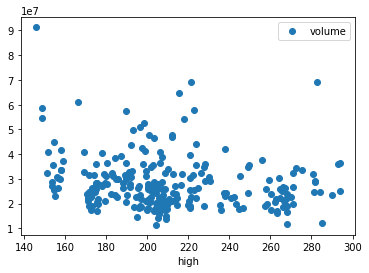

In [ ]:
last_years_data.plot(x='high',y='volume',style='o')

In [ ]:
last_years_data.corr()

,open,high,low,close,adjusted_close,volume
open,1.000000,0.999142,0.998962,0.998096,0.998106,-0.188881
high,0.999142,1.000000,0.998759,0.998996,0.998983,-0.176019
low,0.998962,0.998759,1.000000,0.999036,0.999008,-0.207924
close,0.998096,0.998996,0.999036,1.000000,0.999934,-0.197556
adjusted_close,0.998106,0.998983,0.999008,0.999934,1.000000,-0.197862
volume,-0.188881,-0.176019,-0.207924,-0.197556,-0.197862,1.000000


In [ ]:
apple_sales = {'iPhone sales by Million':[231.2, 211.8, 216.7, 217.7, 187.2],
             'iPad sales By Million':[52.8,45.5,42.7,43.5,45.2],
             'Mac Book Sales By Million':[25.3, 22.7, 25.6, 25.2, 24.7]}

In [ ]:
tesla_sales_data = {
    'canada' : [9016, 12204 ,12661, 14545, 14023],
 'united states' : [25416 ,	47644 ,50145 ,191627, 192250],
 'europe' : [15231, 15451, 27986, 29614, 111728],
}

tesla_global_sales = [0,0,0,0,0]
apple_global_sales = [0,0,0,0,0]

for i in range(0,5):
  for item in tesla_sales_data:
    tesla_global_sales[i] += tesla_sales_data[item][i]
  for item in apple_sales:
    apple_global_sales[i] += apple_sales[item][i] * 1000000

pd_tesla_global = pd.DataFrame(tesla_global_sales, index=[2015,2016,2017,2018,2019], dtype=int64)
pd_apple_global = pd.DataFrame(apple_global_sales, index=[2015,2016,2017,2018,2019], dtype=int64)


In [ ]:
tesla_frame

In [ ]:
yearlens = {
    '2015' : 252,
    '2016' : 252,
    '2017' : 251,
    '2018' : 251,
    '2019' : 252
}

#1136:2393

year2015 = tesla_frame['Adj Close'][1136:1388].sum() / yearlens['2015']
year2016 = tesla_frame['Adj Close'][1389:(1389+251)].sum() / yearlens['2016']
year2017 = tesla_frame['Adj Close'][1389+251+1:(1389+251+1+250)].sum() / yearlens['2017']
year2018 = tesla_frame['Adj Close'][(1389+251+250+1+1):(1389+251+250*2+1+1)].sum() / yearlens['2018']
year2019 = tesla_frame['Adj Close'][((1389+251+250*2+1+1+1)):((1389+251*2+250*2+1+1+1))].sum() / yearlens['2019']




In [ ]:
year2015

230.0428976634192

In [ ]:
year2015

230.042897659127

In [ ]:
pd_tesla_global

,0
2015,49663
2016,75299
2017,90792
2018,235786
2019,318001


In [ ]:
pd_apple_global

,0
2015,309300000
2016,280000000
2017,285000000
2018,286400000
2019,257100000


In [ ]:
concatted = pd.concat([pd_apple_global,pd_tesla_global],axis=1)
concatted.set_axis(['Tesla','Apple'],axis=1,inplace=True)

In [ ]:
concatted

,Tesla,Apple
2015,309300000,49663
2016,280000000,75299
2017,285000000,90792
2018,286400000,235786
2019,257100000,318001


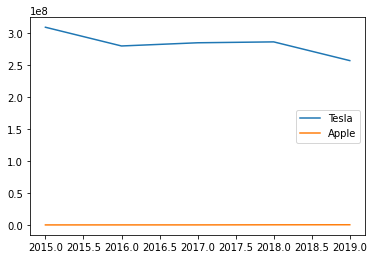

In [ ]:
concatted.plot()

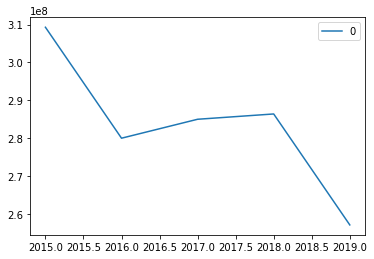

In [ ]:
pd_apple_global.plot()

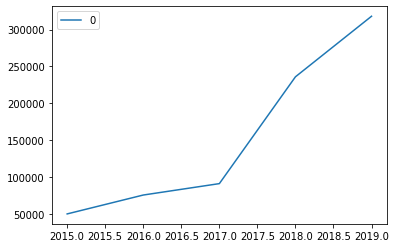

In [ ]:
pd_tesla_global.plot()

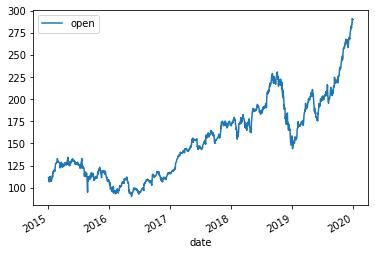

In [ ]:
apple_frame['2015-01-01':'2020-01-01'].plot(y='open')

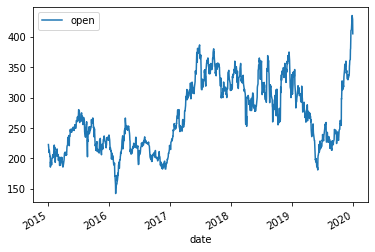

In [ ]:
tesla_frame['2015-01-01':'2020-01-01'].plot(y='open')

In [ ]:
year2015

230.042897659127

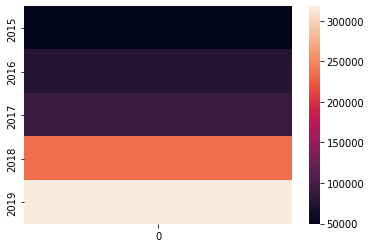

In [ ]:
sns.heatmap(pd_tesla_global)


In [ ]:


dup_apple_frame = apple_frame['2015-01-01':'2015-12-31'].drop(labels=['open', 'close', 'high', 'low', 'volume'], axis=1)

concat_apple = pd.concat([dup_apple_frame, pd_apple_global], axis=1)

concat_apple

concatted_tesla = pd.concat([pd_tesla_global,tesla_frame['2015-01-01':'2015-12-31'].drop(labels=['open','close','high','low','volume'],axis=1),apple_frame['2015-01-01':'2015-12-31'].drop(labels=['open', 'close', 'high', 'low', 'volume'], axis=1)],axis=1)


KeyError: ignored

In [ ]:
concatted_tesla

In [ ]:
concatted_tesla.set_axis('Date',inplace=True)
concatted_tesla['2019-01-01':'2020-01-01'].plot()

In [ ]:
concatted.plot()

In [ ]:
concatted['Tesla'].sum()*50000

In [ ]:
concatted['Apple'].sum() * 1200

In [ ]:
sns.heatmap(concatted)

In [ ]:
def my_function(*args):
  pd..box()

In [ ]:
try:
  tesla_data = pd.read_csv('/content/drive/MyDrive/TSLA.csv',parse_dates=['Date'])
  tesla_try = pd.DataFrame(tesla_data)
except pd.errors.EmptyDataError:
  print('This data set is empty')

In [ ]:
my_function(tesla_try)

In [ ]:
apple_frame.corr()

,open,high,low,close,adjusted_close,volume
open,1.000000,0.999920,0.999894,0.999817,0.335908,0.258082
high,0.999920,1.000000,0.999867,0.999911,0.335957,0.259574
low,0.999894,0.999867,1.000000,0.999905,0.336582,0.255995
close,0.999817,0.999911,0.999905,1.000000,0.336472,0.257902
adjusted_close,0.335908,0.335957,0.336582,0.336472,1.000000,0.720051
volume,0.258082,0.259574,0.255995,0.257902,0.720051,1.000000


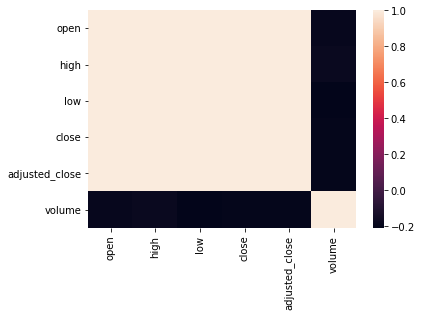

In [ ]:
sns.heatmap(apple_frame['2019-01-01':'2020-01-01'].corr())

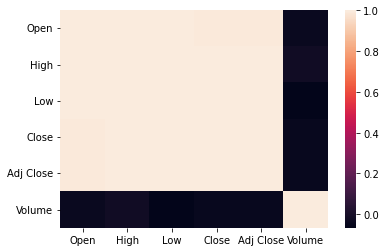

In [ ]:
sns.heatmap(tesla_frame['2019-01-01':'2020-01-01'].corr())

In [ ]:
tesla = tesla_frame.loc['2019-01-01':'2020-01-01']

In [ ]:
newlist = []

In [ ]:
newlist.append(tesla.loc['2019-01-01':'2020-01-01','Open'].mean())

In [ ]:
newlist.append(tesla_frame.loc['2018-01-01':'2019-01-01','Open'].mean())

In [ ]:
newlist.append(tesla_frame.loc['2017-01-01':'2018-01-01','Open'].mean())

In [ ]:
newlist.append(tesla_frame.loc['2016-01-01':'2017-01-01','Open'].mean())

In [ ]:
newlist.append(tesla_frame.loc['2015-01-01':'2017-01-01','Open'].mean())

In [ ]:
yearly_stock = pd.DataFrame(newlist, index=[2015,2016,2017,2018,2019], dtype=int64)

In [ ]:
yearly_stock

,0
2015,273
2016,317
2017,314
2018,210
2019,219


In [ ]:
both=pd.concat([yearly_stock, pd_tesla_global],axis=1,join='outer')

In [ ]:
names = ['stock','sales']
both.columns=names
both.index.name ='date'

In [ ]:
both

,stock,sales
date,,
2015,273,49663
2016,317,75299
2017,314,90792
2018,210,235786
2019,219,318001


In [ ]:
both.corr()

,stock,sales
stock,1.000000,-0.845788
sales,-0.845788,1.000000


In [ ]:
sns.pairplot()

In [ ]:
tools=both.corr()

In [ ]:
newlist2=[]

In [ ]:
apple_frame

In [ ]:
newlist2.append(apple_frame.loc['2019-01-01':'2020-01-01','open'].mean())
newlist2.append(apple_frame.loc['2018-01-01':'2019-01-01','open'].mean())
newlist2.append(apple_frame.loc['2017-01-01':'2018-01-01','open'].mean())
newlist2.append(apple_frame.loc['2016-01-01':'2017-01-01','open'].mean())
newlist2.append(apple_frame.loc['2015-01-01':'2016-01-01','open'].mean())

In [ ]:
newlist2

[207.86907936507933,
 189.10553585657368,
 150.4508466135458,
 104.50769841269846,
 120.16952380952385]

In [ ]:
yearly_stock2 = pd.DataFrame(newlist2, index=[2015,2016,2017,2018,2019])

In [ ]:
both2=pd.concat([yearly_stock2, pd_tesla_global],axis=1)

In [ ]:
both2

,0,0
2015,207.869079,49663
2016,189.105536,75299
2017,150.450847,90792
2018,104.507698,235786
2019,120.169524,318001


In [ ]:
both2.corr()

,0,0
0,1.000000,-0.863198
0,-0.863198,1.000000


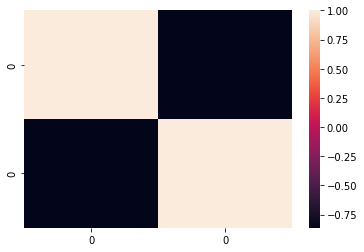

In [ ]:
sns.heatmap(both2.corr())